<a href="https://colab.research.google.com/github/ChristNguyen/VNU_master/blob/main/GIST_visionlab_Nguyen_Duc_Truong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words= stopwords.words('english')

In [ ]:
# import necessary library
from collections import defaultdict
import gensim
from gensim.parsing.preprocessing import strip_non_alphanum, strip_multiple_whitespaces, preprocess_string, split_alphanum, strip_short, strip_numeric
import time
from pathlib import Path
import pandas as pd
from keras.models import *
from keras.layers import *
from keras.callbacks import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stoplist = stopwords.words('english')
from nltk.corpus import stopwords
from __future__ import division, print_function
from gensim import models

from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import os
import collections
import string
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import models, layers, optimizers
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import bz2
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

plt.style.use('ggplot')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!cd /content/drive/MyDrive/

In [ ]:
# unzip dataset
import tarfile
tf = tarfile.open("/content/drive/MyDrive/data.tar.gz")
tf.extractall()

In [ ]:
/content/data/test

In [ ]:
# Read all train and test folder data
results = defaultdict(list)
for file in Path('/content/data/train/negative').iterdir():
    with open(file, "r") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
df1 = pd.DataFrame(results)
results = defaultdict(list)
for file in Path('/content/data/train/positive').iterdir():
    with open(file, "r") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
df2 = pd.DataFrame(results)

results = defaultdict(list)
for file in Path('/content/data/test/negative').iterdir():
    with open(file, "r") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
df3 = pd.DataFrame(results)
results = defaultdict(list)
for file in Path('/content/data/test/positive').iterdir():
    with open(file, "r") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
df4 = pd.DataFrame(results)

In [ ]:
df1['label']= 0
df1['phase']= 'train'
df1= df1[['text', 'label', 'phase']]
df2['label']= 1
df2['phase']= 'train'
df2= df2[['text', 'label', 'phase']]
df3['label']= 0
df3['phase']= 'test'
df3= df3[['text', 'label', 'phase']]
df4['label']= 1
df4['phase']= 'test'
df4= df4[['text', 'label', 'phase']]

In [ ]:
# combine all data to preprocess
data = pd.concat([df1, df2, df3,df4])

In [ ]:
pos = []
neg = []
for l in data.label:
    if l == 0:
        pos.append(0)
        neg.append(1)
    elif l == 1:
        pos.append(1)
        neg.append(0)

In [ ]:
data.columns = ['Text', 'Label', 'phase']

In [ ]:
data['Pos']= pos
data['Neg']= neg

In [ ]:
data

,Text,Label,phase,Pos,Neg
0,do n't bother with this one life is too short ...,0,train,0,1
1,this did n't make me happy - its hard to be em...,0,train,0,1
2,"fraud , plain and simple dr. dean ornish is a ...",0,train,0,1
3,"people will believe anything it seems okay , m...",0,train,0,1
4,these reviewers blindly regirgitate antiscienc...,0,train,0,1
...,...,...,...,...,...
995,excellent book for asd kids a wonderful book f...,1,test,1,0
996,a great cookbook -- - even if you do n't cook ...,1,test,1,0
997,"nothing new , but a good refresher ziegler cer...",1,test,1,0
998,fun books junie b. jones books are a real blas...,1,test,1,0


#Preprocessing 

In [ ]:


# Convert uppercase to lowercase
def lower_case(docs):
  return [doc.lower() for doc in docs]

# Remove special characters
def remove_punc(docs):
  return [strip_non_alphanum(doc).strip() for doc in docs]

# Separate consecutive numbers and letters
def separate_num(docs):
  return [split_alphanum(doc) for doc in docs]

# Remove numbers from the text because they don't make much sense in classifying words
def remove_number(docs):
  return [strip_numeric(doc) for doc in docs]

# Replaces multiple spaces with 1 space
def replace_multiple_whitespaces(docs):
  return [strip_multiple_whitespaces(doc) for doc in docs]
#remove short words

# Remove stop words
def remove_stopwords(docs):
    return [[word for word in doc.split() if word not in stop_words] for doc in docs]

docs = lower_case(data['Text'])
docs = remove_punc(docs)
docs = separate_num(docs)
docs = remove_number(docs)
docs = replace_multiple_whitespaces(docs)
docs = remove_stopwords(docs)
all_words =  [' '.join(sen) for sen in docs]
data['Text_Final'] = all_words
data['Text_Final']= data['Text_Final'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) 

In [ ]:
data['tokens'] = data['Text_Final'].apply(lambda x: x.split())
token_list = data['tokens'].tolist()
token_list=  (sum(token_list, []))

In [ ]:
data['Word_Length']=data['Text_Final'].apply(lambda x: len(x.split()))
print(data[data['phase']== 'train']['Word_Length'].mean())
print(data[data['phase']== 'train']['Word_Length'].max())
data_list = data['tokens'].tolist()
data_list=  (sum(data_list, []))
data_set = set(data_list)
number_of_unique_values1 = len(data_set)
print(number_of_unique_values1)

77.2065
1640
29528


In [ ]:
# Take only top 10000 frequent words
values, counts = np.unique(col_one_list, return_counts=True)
frequent_words = pd.DataFrame(
    {'values': values,
     'counts': counts
    })
frequent_words = frequent_words.sort_values('counts', ascending= False)[:10000]
vocabulary = frequent_words['values'].tolist()


In [ ]:
def word_vocab(docs):
    return [[word for word in doc if word in vocabulary] for doc in docs]
docs = word_vocab(docs)

all_words =  [' '.join(sen) for sen in docs]
data['Text_Final'] = all_words

# **Data statistic**

In [ ]:
MAX_LENGTH = 200
max_fatures = 10000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Text_Final'].values)
X = tokenizer.texts_to_sequences(data['Text_Final'].values)
X = pad_sequences(X,maxlen=200)
Y= data['Label'].values
train_texts, val_texts, train_labels, val_labels = train_test_split(
    X, Y, random_state=57643892, test_size=0.2)


In [ ]:
train_texts = data['Text_Final'].values
train_labels= data['Label'].values
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts, train_labels, random_state=57643892, test_size=0.2)

In [ ]:
train_texts.shape

(3200, 200)

In [ ]:
dataset = pd.DataFrame({'train_labels': list(train_labels), 'train_texts': list(train_texts)}, columns=['train_labels', 'train_texts'])
print(dataset['train_labels'].value_counts())
dataset['tokens'] = dataset['train_texts'].apply(lambda x: x.split())
col_one_list = dataset['tokens'].tolist()
col_one_list=  (sum(col_one_list, []))
a_set = set(col_one_list)
number_of_unique_values = len(a_set)
print(number_of_unique_values)
dataset['Word_Length']=dataset['train_texts'].apply(lambda x: len(x.split()))
print(dataset['Word_Length'].mean())
print(dataset['Word_Length'].max())

0    1605
1    1595
Name: train_labels, dtype: int64
26271
76.13125
1640


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


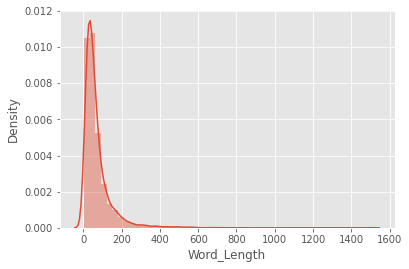

In [ ]:
import seaborn as sns
sns.distplot(dataset['Word_Length'])

# **Preparing embedding**

In [ ]:
MAX_FEATURES = 10000
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train_texts)
train_texts = tokenizer.texts_to_sequences(train_texts)
#val_texts = tokenizer.texts_to_sequences(val_texts)

AttributeError: ignored

In [ ]:
size_of_vocabulary=len(tokenizer.word_index) + 1 #+1 for padding

print(size_of_vocabulary)

10001


In [ ]:
MAX_LENGTH = 200
train_texts = pad_sequences(train_texts, maxlen=MAX_LENGTH)
#val_texts = pad_sequences(val_texts, maxlen=MAX_LENGTH)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_texts,train_labels, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2144, 200) (2144,)
(1056, 200) (1056,)


In [ ]:
X_train = np.concatenate((train_texts, val_texts), axis=0)
y_train = np.concatenate((train_labels, val_labels ), axis = 0)

# **Load pretrained embedding matrix**

In [ ]:
# load the whole embedding matrix dataset

embeddings_index = dict()
f = open('../content/data/all.review.vec.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

size_of_vocabulary=len(tokenizer.word_index) + 1 #+1 for padding
print(size_of_vocabulary)
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((size_of_vocabulary, 100))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Loaded 56051 word vectors.
10001


# **CNN MODEL w/o pretrained**

In [ ]:

def build_model(var_optimizer='rmsprop'):
    sequences = layers.Input(shape=(MAX_LENGTH,))
    embedded = layers.Embedding(MAX_FEATURES, 100)(sequences)
    x = layers.Conv1D(100, 3, activation='relu')(embedded)
    
    x = layers.Dense(100, activation=None)(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=sequences, outputs=predictions)
    model.compile( optimizer=var_optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model
    
model = build_model()
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=7)  
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  

In [ ]:

_optimizers=['sgd','adam','rmsprop']
_batch_size=[16,32,64, 128]
params=dict(
            var_optimizer=_optimizers,
            batch_size=_batch_size)
print(params)

{'var_optimizer': ['sgd', 'adam', 'rmsprop'], 'batch_size': [16, 32, 64, 128]}


In [ ]:
model = KerasClassifier(build_fn=build_model,epochs=4,batch_size=16)

In [ ]:
# fine tuning to find hyperparameter
rscv = RandomizedSearchCV(model, param_distributions=params, cv=3,     n_iter=10)
rscv_results = rscv.fit(X_train,y_train)

Epoch 1/4
21/21 [==============================] - 3s 88ms/step - loss: 0.6933 - accuracy: 0.5033
Epoch 2/4
21/21 [==============================] - 2s 87ms/step - loss: 0.6814 - accuracy: 0.5600
Epoch 3/4
21/21 [==============================] - 2s 88ms/step - loss: 0.6374 - accuracy: 0.6062
Epoch 4/4
11/11 [==============================] - 0s 24ms/step - loss: 0.7094 - accuracy: 0.5521
Epoch 1/4
21/21 [==============================] - 3s 87ms/step - loss: 0.6929 - accuracy: 0.5077
Epoch 2/4
21/21 [==============================] - 2s 88ms/step - loss: 0.6772 - accuracy: 0.5832
Epoch 3/4
21/21 [==============================] - 2s 88ms/step - loss: 0.6335 - accuracy: 0.6123
Epoch 4/4
11/11 [==============================] - 0s 24ms/step - loss: 0.7121 - accuracy: 0.5586
Epoch 1/4
21/21 [==============================] - 3s 90ms/step - loss: 0.6933 - accuracy: 0.4981
Epoch 2/4
21/21 [==============================] - 2s 88ms/step - loss: 0.6833 - accuracy: 0.5542
Epoch 3/4
21/21 [===

In [ ]:
print('Best score is: {} using {}'.format(rscv_results.best_score_,
rscv_results.best_params_))

Best score is: 0.5608930985132853 using {'var_optimizer': 'rmsprop', 'batch_size': 32}


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 200, 100)          1000100   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 198, 100)          30100     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 49, 100)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4900)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               490100    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 1,520,401
Trainable params: 1,520,401
Non-trainable params: 0
____________________________________________

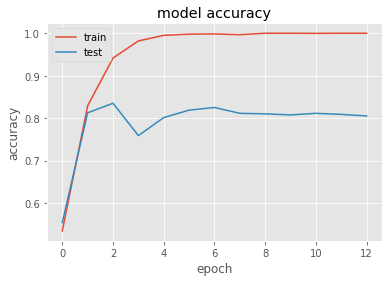

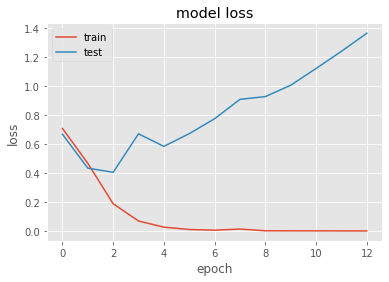

In [ ]:
model_glove=Sequential()

#embedding layer
model_glove.add(Embedding(size_of_vocabulary,100,input_length=MAX_LENGTH)) 

#lstm layer
model_glove.add(Conv1D(100, 3, activation='relu',strides=1))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(Flatten())
model_glove.add(Dense(100, activation= None))
model_glove.add(Dense(1, activation='sigmoid'))

#Add loss function, metrics, optimizer
model_glove.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=["accuracy"]) 

#Adding callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)  
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  

#Print summary of model
print(model_glove.summary())
start = time.time()
history = model_glove.fit(train_texts,np.array(train_labels),batch_size= 128,epochs=60,validation_data=(val_texts,np.array(val_labels)),verbose=1,callbacks=[es,mc])

stop = time.time()
print(f"Training time for CNN w/o pretrained : {stop - start}s")
print('ACC max',np.max(history.history['accuracy']))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **CNN w pretrained**

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 100)          1000100   
_________________________________________________________________
lstm_6 (LSTM)                (None, 200, 100)          80400     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 1,090,701
Trainable params: 90,601
Non-trainable params: 1,000,100
_________________________________________________________________
None
Epoch 1/60
25/25 [==============================] - 4s 137ms/step - loss: 1.0606 - accuracy: 0.5283 

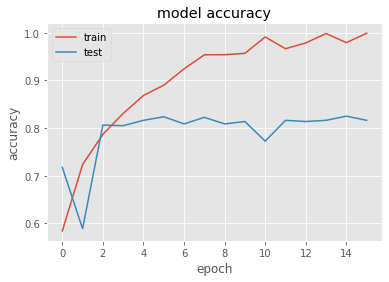

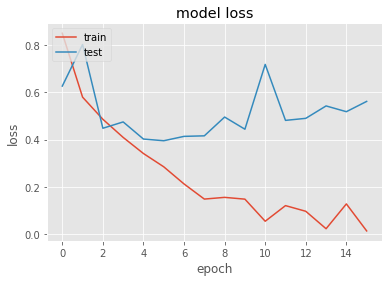

In [ ]:
model_glove=Sequential()

#embedding layer
model_glove.add(Embedding(size_of_vocabulary,100,weights=[embedding_matrix],input_length=MAX_LENGTH,trainable=False)) 

#lstm layer
model_glove.add(Conv1D(100, 3, activation='relu',strides=1))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(Flatten())
model_glove.add(Dense(100, activation= None))
model_glove.add(Dense(1, activation='sigmoid'))

#Add loss function, metrics, optimizer
model_glove.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=["accuracy"]) 

#Adding callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)  
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  

#Print summary of model
print(model.summary())
start = time.time()
history = model_glove.fit(train_texts,np.array(train_labels),batch_size= 128,epochs=60,validation_data=(val_texts,np.array(val_labels)),verbose=1,callbacks=[es,mc])

stop = time.time()
print(f"Training time for CNN w pretrained : {stop - start}s")
print('ACC max',np.max(history.history['accuracy']))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/20
100/100 [==============================] - 4s 36ms/step - loss: 0.6914 - accuracy: 0.5009 - val_loss: 0.6736 - val_accuracy: 0.5499
Epoch 2/20
100/100 [==============================] - 3s 35ms/step - loss: 0.6725 - accuracy: 0.5429 - val_loss: 0.6708 - val_accuracy: 0.5529
Epoch 3/20
100/100 [==============================] - 3s 34ms/step - loss: 0.6652 - accuracy: 0.5484 - val_loss: 0.6719 - val_accuracy: 0.5420
Epoch 4/20
100/100 [==============================] - 3s 34ms/step - loss: 0.6652 - accuracy: 0.5467 - val_loss: 0.6701 - val_accuracy: 0.5440
Epoch 5/20
100/100 [==============================] - 3s 34ms/step - loss: 0.6598 - accuracy: 0.5633 - val_loss: 0.6700 - val_accuracy: 0.5524
Epoch 6/20
100/100 [==============================] - 3s 34ms/step - loss: 0.6577 - accuracy: 0.5694 - val_loss: 0.6691 - val_accuracy: 0.5453
Epoch 7/20
100/100 [==============================] - 3s 34ms/step - loss: 0.6517 - accuracy: 0.5478 - val_loss: 0.6725 - val_accuracy: 0.5407

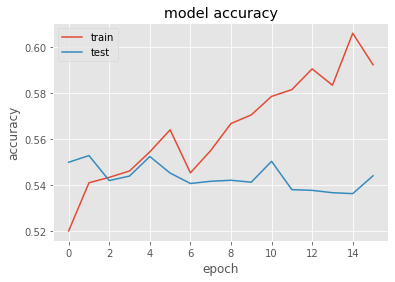

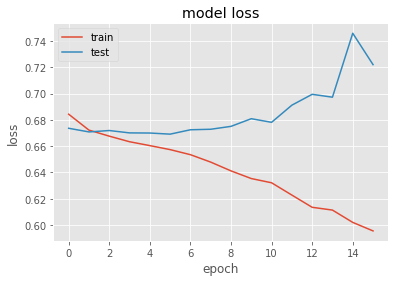

In [ ]:
model_glove = Sequential()
model_glove.add(Embedding(size_of_vocabulary, 100, input_length=50, weights=[embedding_matrix], trainable=False))
model_glove.add(Conv1D(100, 3, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))

model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
## Fit train data
start = time.time()
history = model_glove.fit(train_texts,np.array(train_labels),batch_size=32,epochs=20,validation_data=(val_texts,np.array(val_labels)),verbose=1,callbacks=[es,mc])

stop = time.time()
print(f"Training time for CNN w pretrained : {stop - start}s")
print('ACC max',np.max(history.history['accuracy']))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = KerasClassifier(build_fn=build_model,epochs=4,batch_size=16)

In [ ]:
rscv = RandomizedSearchCV(model, param_distributions=params, cv=3,     n_iter=5)
rscv_results = rscv.fit(X_train, y_train)

Epoch 1/4
84/84 [==============================] - 2s 16ms/step - loss: 0.6955 - acc: 0.5084
Epoch 2/4
84/84 [==============================] - 1s 15ms/step - loss: 0.6684 - acc: 0.5653
Epoch 3/4
84/84 [==============================] - 1s 15ms/step - loss: 0.6668 - acc: 0.5678
Epoch 4/4
42/42 [==============================] - 0s 7ms/step - loss: 0.6637 - acc: 0.5719
Epoch 1/4
84/84 [==============================] - 2s 15ms/step - loss: 0.6856 - acc: 0.5358
Epoch 2/4
84/84 [==============================] - 1s 15ms/step - loss: 0.6713 - acc: 0.5675
Epoch 3/4
84/84 [==============================] - 1s 15ms/step - loss: 0.6646 - acc: 0.5765
Epoch 4/4
42/42 [==============================] - 0s 6ms/step - loss: 0.6717 - acc: 0.5617
Epoch 1/4
84/84 [==============================] - 2s 15ms/step - loss: 0.6932 - acc: 0.5088
Epoch 2/4
84/84 [==============================] - 1s 15ms/step - loss: 0.6719 - acc: 0.5695
Epoch 3/4
84/84 [==============================] - 1s 16ms/step - loss: 

In [ ]:
print('Best score is: {} using {}'.format(rscv_results.best_score_,
rscv_results.best_params_))

Best score is: 0.5700048208236694 using {'var_optimizer': 'rmsprop', 'batch_size': 32}


# **RNN w/o pretrained**

In [ ]:
def build_rnn_model():
    sequences = layers.Input(shape=(MAX_LENGTH,))
    embedded = layers.Embedding(MAX_FEATURES, 100)(sequences)
    x = layers.LSTM(100,activation='tanh', return_sequences=True)(embedded)
    x= layers.Dense(100, activation= None)(x)
    predictions = layers.Dense(1, None)(x)
    model = models.Model(inputs=sequences, outputs=predictions)
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model
    
rnn_model = build_rnn_model()

Epoch 1/20
100/100 [==============================] - 22s 198ms/step - loss: 0.6718 - accuracy: 0.5952 - val_loss: 0.4189 - val_accuracy: 0.8175
Epoch 2/20
100/100 [==============================] - 20s 200ms/step - loss: 0.2434 - accuracy: 0.9095 - val_loss: 0.3898 - val_accuracy: 0.8325
Epoch 3/20
100/100 [==============================] - 20s 198ms/step - loss: 0.1253 - accuracy: 0.9608 - val_loss: 0.4687 - val_accuracy: 0.8225
Epoch 4/20
100/100 [==============================] - 19s 191ms/step - loss: 0.0697 - accuracy: 0.9775 - val_loss: 0.5188 - val_accuracy: 0.8087
Epoch 5/20
100/100 [==============================] - 19s 191ms/step - loss: 0.0329 - accuracy: 0.9905 - val_loss: 0.8080 - val_accuracy: 0.8275
Epoch 6/20
100/100 [==============================] - 19s 192ms/step - loss: 0.0179 - accuracy: 0.9950 - val_loss: 0.8972 - val_accuracy: 0.8175
Epoch 7/20
100/100 [==============================] - 19s 192ms/step - loss: 0.0142 - accuracy: 0.9961 - val_loss: 1.3040 - val_ac

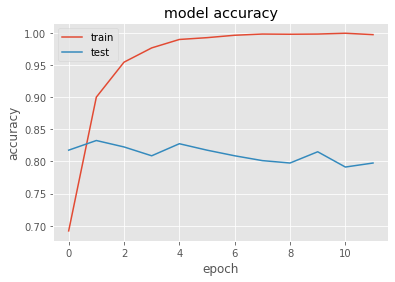

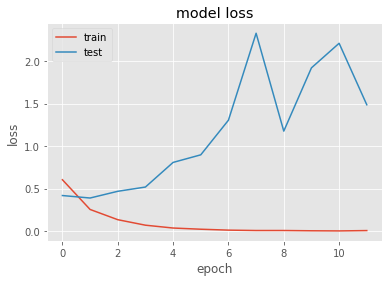

In [ ]:
model=Sequential()

#embedding layer
model.add(Embedding(size_of_vocabulary,100,input_length= MAX_LENGTH)) 

#lstm layer
model.add(LSTM(100,return_sequences=True, activation='tanh'))

model.add(GlobalMaxPooling1D())
#Dense Layer
model.add(Dense(100,activation=None)) 
model.add(Dense(1,activation='sigmoid')) 

#Add loss function, metrics, optimizer
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=["accuracy"]) 

#Adding callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)  
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  
start = time.time()
history = model.fit(train_texts, train_labels,batch_size=32,epochs=20,validation_data=(val_texts, val_labels),verbose=1,callbacks=[es,mc])

stop = time.time()
print(f"Training time for RNN w pretrained : {stop - start}s")
print('ACC max',np.max(history.history['accuracy']))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **RNN w pretrained**

Epoch 1/20
100/100 [==============================] - 18s 159ms/step - loss: 0.6303 - accuracy: 0.6454 - val_loss: 0.4164 - val_accuracy: 0.8425
Epoch 2/20
100/100 [==============================] - 15s 152ms/step - loss: 0.4307 - accuracy: 0.8011 - val_loss: 0.4050 - val_accuracy: 0.8213
Epoch 3/20
100/100 [==============================] - 15s 147ms/step - loss: 0.3633 - accuracy: 0.8467 - val_loss: 0.3493 - val_accuracy: 0.8662
Epoch 4/20
100/100 [==============================] - 15s 146ms/step - loss: 0.3353 - accuracy: 0.8525 - val_loss: 0.3681 - val_accuracy: 0.8500
Epoch 5/20
100/100 [==============================] - 14s 144ms/step - loss: 0.2940 - accuracy: 0.8768 - val_loss: 0.3151 - val_accuracy: 0.8788
Epoch 6/20
100/100 [==============================] - 15s 146ms/step - loss: 0.2672 - accuracy: 0.8880 - val_loss: 0.3096 - val_accuracy: 0.8737
Epoch 7/20
100/100 [==============================] - 14s 139ms/step - loss: 0.2163 - accuracy: 0.9113 - val_loss: 0.3092 - val_ac

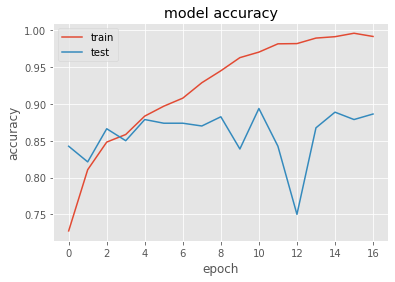

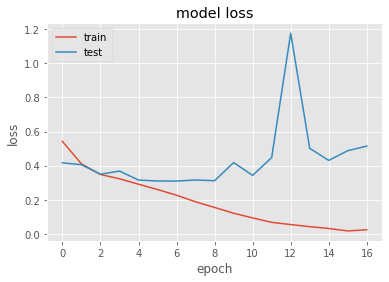

In [ ]:
model=Sequential()

#embedding layer
model.add(Embedding(size_of_vocabulary,100,weights=[embedding_matrix],input_length= MAX_LENGTH,trainable=False)) 

#lstm layer
model.add(LSTM(100,return_sequences=True, activation='tanh'))

model.add(GlobalMaxPooling1D())
#Dense Layer
model.add(Dense(100,activation=None)) 
model.add(Dense(1,activation='sigmoid')) 

#Add loss function, metrics, optimizer
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=["accuracy"]) 

#Adding callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)  
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  
start = time.time()
history = model.fit(train_texts, train_labels,batch_size=32,epochs=20,validation_data=(val_texts, val_labels),verbose=1,callbacks=[es,mc])

stop = time.time()
print(f"Training time for RNN w pretrained : {stop - start}s")
print('ACC max',np.max(history.history['accuracy']))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Test with more advance model=> accuracy more high**

Epoch 1/10
100/100 [==============================] - 16s 142ms/step - loss: 0.6031 - accuracy: 0.6583 - val_loss: 0.4420 - val_accuracy: 0.7887
Epoch 2/10
100/100 [==============================] - 14s 137ms/step - loss: 0.4008 - accuracy: 0.8210 - val_loss: 0.3646 - val_accuracy: 0.8537
Epoch 3/10
100/100 [==============================] - 14s 138ms/step - loss: 0.3395 - accuracy: 0.8542 - val_loss: 0.3481 - val_accuracy: 0.8512
Epoch 4/10
100/100 [==============================] - 14s 138ms/step - loss: 0.3264 - accuracy: 0.8571 - val_loss: 0.3518 - val_accuracy: 0.8525
Epoch 5/10
100/100 [==============================] - 14s 138ms/step - loss: 0.3206 - accuracy: 0.8635 - val_loss: 0.3274 - val_accuracy: 0.8612
Epoch 6/10
100/100 [==============================] - 14s 138ms/step - loss: 0.2801 - accuracy: 0.8764 - val_loss: 0.4061 - val_accuracy: 0.8150
Epoch 7/10
100/100 [==============================] - 14s 138ms/step - loss: 0.2878 - accuracy: 0.8722 - val_loss: 0.3315 - val_ac

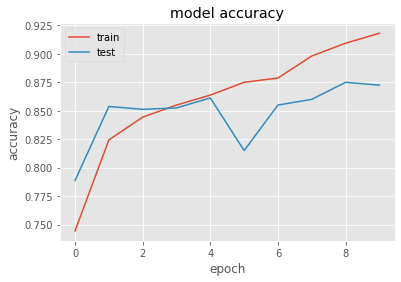

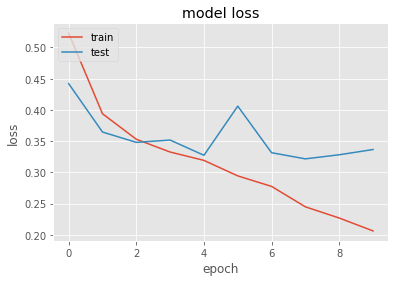

In [ ]:
model=Sequential()

#embedding layer
model.add(Embedding(size_of_vocabulary,100,weights=[embedding_matrix],input_length=100,trainable=False)) 

#lstm layer
model.add(LSTM(100,return_sequences=True,dropout=0.2))

#Global Maxpooling
model.add(GlobalMaxPooling1D())

#Dense Layer
model.add(Dense(100,activation='relu')) 
model.add(Dense(1,activation='sigmoid')) 

#Add loss function, metrics, optimizer
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["accuracy"]) 

#Adding callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  
start = time.time()
history = model.fit(train_texts,np.array(train_labels),batch_size=32,epochs=10,validation_data=(val_texts,np.array(val_labels)),verbose=1,callbacks=[es,mc])

stop = time.time()
print(f"Training time for CNN w/o pretrained : {stop - start}s")
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()